# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**Important Note:** This notebook was generated by an AI assistant (Minicline) based on the Dandiset metadata and exploratory analysis of one NWB file. It has not been fully verified by human experts. Please exercise caution when interpreting the code and results, and verify any findings independently.

## Overview of Dandiset 001375

This Dandiset contains data from a pilot study investigating the effect of disrupting septal GABAergic activity using DREADDs (Designer Receptors Exclusively Activated by Designer Drugs) on hippocampal and neocortical activity in mice.

**Dandiset Link:** [https://dandiarchive.org/dandiset/001375](https://dandiarchive.org/dandiset/001375)

**Citation:** Eckert, Michael; McNaughton, Bruce; Ferbinteanu, Janina (2025) Septum GABA disruption with DREADDs (Version draft) [Data set]. DANDI Archive. https://dandiarchive.org/dandiset/001375/draft

**Description:** Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity

## Notebook Goal

This notebook demonstrates how to:
1. Access basic metadata about the Dandiset using the DANDI API.
2. List the assets (files) within the Dandiset.
3. Load a specific NWB (Neurodata Without Borders) file from the Dandiset.
4. Explore the structure and basic metadata of the NWB file.
5. Load and visualize different types of data stored within the NWB file, including:
    - Trial information
    - Unit spike times
    - Raw electrophysiology recordings

## Required Packages

This notebook requires the following Python packages. It assumes they are already installed in your environment.

```
- dandi
- pynwb
- h5py
- remfile
- numpy
- pandas
- matplotlib
- seaborn
```

We will import them as needed.

## 1. Loading Dandiset Information

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
print("Connecting to DANDI API...")
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
print("Fetching Dandiset metadata...")
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata.get('name', 'N/A')}")
print(f"Dandiset URL: {metadata.get('url', 'N/A')}")
print(f"Description: {metadata.get('description', 'N/A')}")

# List the assets in the Dandiset
print("\nFetching Dandiset assets...")
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nAssets:")
for asset in assets:
    print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size} bytes)")

Connecting to DANDI API...
Fetching Dandiset metadata...


Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855
Description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity

Fetching Dandiset assets...

Found 3 assets in the dataset

Assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897, Size: 54970745645 bytes)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74, Size: 69445661969 bytes)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16, Size: 69788881498 bytes)


## 2. Loading an NWB File

We will now load one of the NWB files to explore its contents. We'll choose the first asset listed: `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`.

To load the file directly from the DANDI archive without downloading it locally, we need its download URL. This can be constructed using the asset ID.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the asset we want to load
chosen_asset_path = "sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb"
chosen_asset_id = "ce525828-8534-4b56-9e47-d2a34d1aa897" # Found from the asset listing above
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{chosen_asset_id}/download/"

print(f"Selected NWB file path: {chosen_asset_path}")
print(f"Constructed download URL: {nwb_file_url}")

# Load the NWB file using remfile for remote access
print("\nLoading NWB file remotely... (this may take a moment)")
try:
    remote_file = remfile.File(nwb_file_url)
    h5_file = h5py.File(remote_file, 'r') # Ensure read-only mode
    io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Ensure read-only mode
    nwb = io.read()
    print("NWB file loaded successfully.")
except Exception as e:
    print(f"Error loading NWB file: {e}")
    nwb = None # Set nwb to None if loading fails

Selected NWB file path: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
Constructed download URL: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/

Loading NWB file remotely... (this may take a moment)


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully.


### NWB File Metadata

Let's look at some basic metadata from the loaded NWB file.

In [3]:
if nwb:
    print(f"Session Description: {getattr(nwb, 'session_description', 'N/A')}")
    print(f"Identifier: {getattr(nwb, 'identifier', 'N/A')}")
    print(f"Session Start Time: {getattr(nwb, 'session_start_time', 'N/A')}")
    print(f"Subject ID: {getattr(nwb.subject, 'subject_id', 'N/A') if nwb.subject else 'N/A'}")
    print(f"Subject Species: {getattr(nwb.subject, 'species', 'N/A') if nwb.subject else 'N/A'}")
else:
    print("NWB file not loaded, cannot display metadata.")

Session Description: mouse running laps in virtual hallway
Identifier: MS13B
Session Start Time: 2024-07-25 19:00:00-07:00
Subject ID: MS13B
Subject Species: Mus musculus


### NWB File Contents Summary

The NWB file format organizes data into different groups. Here's a brief overview of the main data components found in this specific file (`sub-MS13B/...ecephys.nwb`):

*   **/acquisition/time_series**: Contains the raw extracellular electrophysiology data.
    *   `data`: A large dataset (shape: (144675584, 256), dtype: int16) representing voltage traces over time for 256 channels.
    *   `rate`: 30000.0 Hz (sampling frequency).
    *   `unit`: 'mV'.
*   **/intervals/trials**: Information about experimental trials.
    *   `start_time`: Start time of each trial.
    *   `stop_time`: Stop time of each trial.
    *   (Contains 387 trials in this file).
*   **/units**: Data about putative sorted neuronal units (spikes).
    *   `spike_times`: Times at which each unit fired.
    *   (Contains 33 units in this file).
*   **/electrodes**: Metadata about the recording electrodes.
    *   `x`, `y`: Coordinates.
    *   `location`: Brain region.
    *   `group`: Electrode group (e.g., shank).
    *   (Contains 256 electrodes in this file).
*   **/electrode_groups**: Information about groups of electrodes (e.g., shanks).
    *   `shank1`, `shank2`: Details about each shank, including location ('ventral hippocampus, visual cortex') and the device used.
*   **/general/subject**: Information about the experimental subject.
    *   `subject_id`: 'MS13B'
    *   `species`: 'Mus musculus'
    *   `sex`: 'M'
    *   `description`: 'medial septum DREADD to suppress GABA interneurons'

### Explore NWB File on Neurosift

You can interactively explore the structure and data of this specific NWB file using Neurosift:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

## 3. Visualizing Trial Information

Let's examine the distribution of trial durations. We can access the trial start and stop times from `nwb.trials`.

Accessing trial data...
Trial Data Head:
    start_time  stop_time
id                       
0     4.323800  16.929833
1    16.963067  28.414333
2    28.447100  39.402833
3    39.435833  50.027033
4    50.059667  63.064467

Plotting distribution of trial durations...


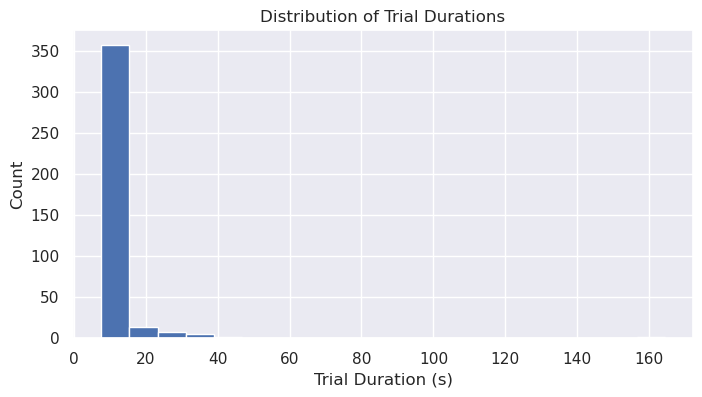

In [4]:
if nwb and hasattr(nwb, 'trials') and nwb.trials is not None:
    print("Accessing trial data...")
    try:
        trials_df = nwb.trials.to_dataframe()
        print("Trial Data Head:")
        print(trials_df.head())

        # Calculate durations
        durations = trials_df['stop_time'] - trials_df['start_time']

        # Plot histogram
        print("\nPlotting distribution of trial durations...")
        sns.set_theme()
        plt.figure(figsize=(8, 4))
        plt.hist(durations, bins=20)
        plt.xlabel('Trial Duration (s)')
        plt.ylabel('Count')
        plt.title('Distribution of Trial Durations')
        plt.show()
        plt.close() # Ensure plot is closed
    except Exception as e:
        print(f"Error processing or plotting trial data: {e}")
else:
    print("Trial data not available in the loaded NWB file.")

The histogram shows that most trials have a duration of around 10-15 seconds, with a few lasting longer.

## 4. Visualizing Unit Spike Times

Next, we'll visualize the firing activity of some neurons (units) using a raster plot. We'll plot the spike times for the first 5 units found in the file over the first 60 seconds of the recording.

Accessing units data...

Preparing raster plot for the first 5 units (IDs: [1, 2, 3, 4, 5]) up to 60.0s...
Plotting raster...


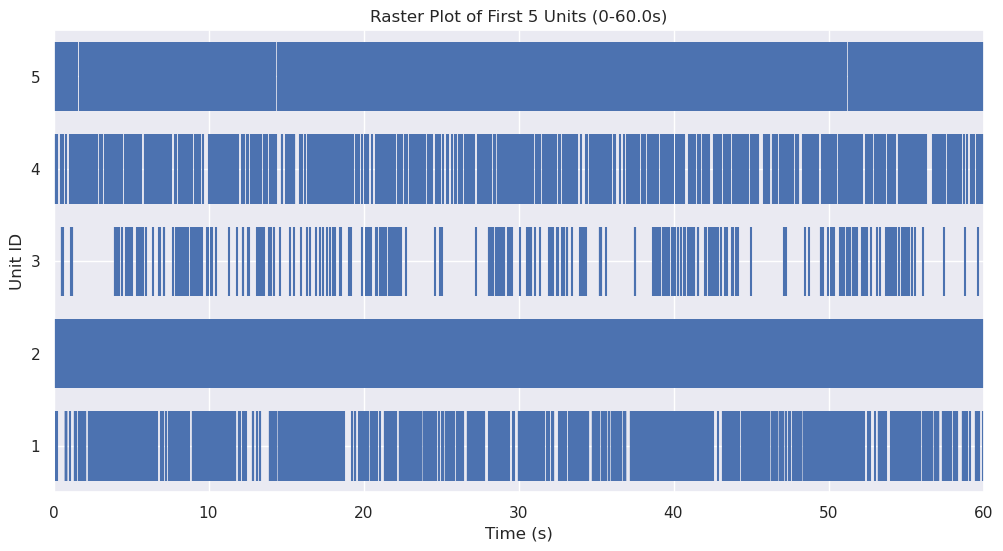

Displayed raster plot for units: [1, 2, 3, 4, 5]


In [5]:
if nwb and hasattr(nwb, 'units') and nwb.units is not None:
    print("Accessing units data...")
    try:
        units_df = nwb.units.to_dataframe()
        num_units_to_plot = 5
        max_time = 60.0 # seconds

        if len(units_df) < num_units_to_plot:
            print(f"Warning: Only found {len(units_df)} units, plotting all.")
            num_units_to_plot = len(units_df)

        unit_ids_to_plot = units_df.index[:num_units_to_plot]

        print(f"Preparing raster plot for the first {num_units_to_plot} units (IDs: {list(unit_ids_to_plot)}) up to {max_time}s...")

        spike_times_list = []
        valid_unit_ids = [] # Track units with spikes in the window

        # Collect spike times within the desired time range
        for unit_id in unit_ids_to_plot:
            # Access spike times for the current unit ID using the Units table index
            st = nwb.units['spike_times'][unit_id][:]
            # Filter spikes within the max_time
            st_filtered = st[st <= max_time]
            if len(st_filtered) > 0:
                spike_times_list.append(st_filtered)
                valid_unit_ids.append(unit_id) # Keep track of the actual unit ID
            else:
                print(f"Unit {unit_id} has no spikes before {max_time}s, skipping.")

        if not spike_times_list:
            print("No spike times found for the selected units within the specified time range.")
        else:
            # Plot raster using valid units
            print("Plotting raster...")
            sns.set_theme()
            plt.figure(figsize=(12, 6))
            plt.eventplot(spike_times_list, linelengths=0.75)
            plt.yticks(np.arange(len(valid_unit_ids)), valid_unit_ids) # Use actual unit IDs for labels
            plt.xlabel('Time (s)')
            plt.ylabel('Unit ID')
            plt.title(f'Raster Plot of First {len(valid_unit_ids)} Units (0-{max_time}s)')
            plt.xlim(0, max_time)
            plt.ylim(-0.5, len(valid_unit_ids) - 0.5) # Adjust ylim
            plt.show()
            plt.close() # Ensure plot is closed
            print(f'Displayed raster plot for units: {valid_unit_ids}')

    except Exception as e:
        print(f"Error processing or plotting unit data: {e}")
else:
    print("Units data not available in the loaded NWB file.")

This raster plot shows the moments each neuron fired a spike (represented by a vertical tick). Different units exhibit distinct firing patterns within this 60-second window. For instance, Unit 2 fires very rapidly and consistently. Units 1 and 4 also show high firing rates, but with more variation than Unit 2. Unit 3 displays sparse, bursty activity with clear periods of silence. Unit 5 shows very sparse firing in this time segment.

## 5. Visualizing Raw Electrophysiology Data

The NWB file contains raw voltage traces from the electrophysiology recording in `/acquisition/time_series`. This dataset is very large, so we will only load and plot a small segment (0.1 seconds) from the first 4 channels to illustrate how to access it.

Accessing TimeSeries data...
Loading data for the first 4 channels (0.1s segment)...


Data segment loaded.
Plotting time series traces...


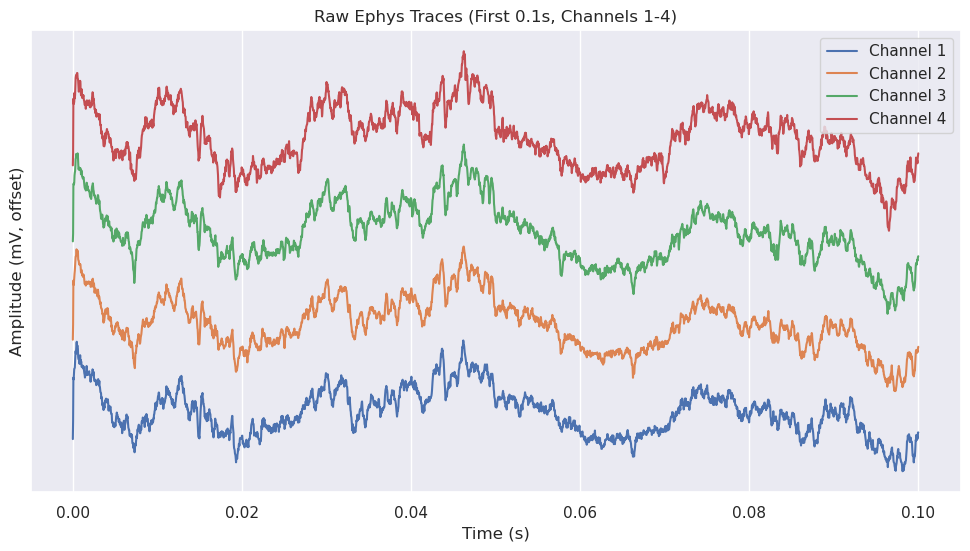

Displayed raw traces plot.


In [6]:
if nwb and 'time_series' in nwb.acquisition:
    print("Accessing TimeSeries data...")
    try:
        ts = nwb.acquisition['time_series']
        sampling_rate = ts.rate
        num_channels_to_plot = 4
        duration_to_plot = 0.1 # seconds
        start_index = 0 # Start from the beginning
        end_index = int(duration_to_plot * sampling_rate)

        print(f'Loading data for the first {num_channels_to_plot} channels ({duration_to_plot}s segment)...')
        # Load the segment directly
        # Note: For larger segments or more channels, consider chunked loading
        data_segment = ts.data[start_index:end_index, :num_channels_to_plot]
        time_vector = np.linspace(start_index / sampling_rate, end_index / sampling_rate, end_index - start_index)
        print("Data segment loaded.")

        print('Plotting time series traces...')
        # Plotting with vertical offset for clarity
        sns.set_theme() # Use seaborn style
        plt.figure(figsize=(12, 6))
        # Calculate an offset based on typical signal range for better visualization
        offset_factor = 3
        channel_offset = np.mean(np.std(data_segment, axis=0)) * offset_factor if data_segment.shape[0] > 1 else 10

        for i in range(num_channels_to_plot):
            plt.plot(time_vector, data_segment[:, i] + i * channel_offset, label=f'Channel {i+1}')

        plt.xlabel('Time (s)')
        plt.ylabel(f'Amplitude ({ts.unit}, offset)')
        plt.title(f'Raw Ephys Traces (First {duration_to_plot}s, Channels 1-{num_channels_to_plot})')
        plt.legend(loc='upper right')
        plt.yticks([]) # Hide y-axis ticks as traces are offset and scale isn't calibrated here
        plt.show()
        plt.close() # Ensure plot is closed
        print("Displayed raw traces plot.")

    except Exception as e:
        print(f"Error processing or plotting time series data: {e}")
else:
    print("TimeSeries 'time_series' not found in acquisition group.")

This plot displays the raw voltage fluctuations recorded by the first four electrode channels over a brief time window. You can see the typical noisy appearance of raw electrophysiology signals. Note that we added an artificial vertical offset to each trace to prevent overlap and make them easier to distinguish.

## 6. Summary and Future Directions

This notebook demonstrated how to access Dandiset 001375, load a specific NWB file (`sub-MS13B/...ecephys.nwb`), and visualize basic data types contained within it: trial information, unit spike times, and raw electrophysiology traces.

**Findings:**
* The selected NWB file contains data from subject MS13B, involving DREADD manipulation in the medial septum.
* The recording includes trial structure, spike times from 33 units, and raw data from 256 channels sampled at 30kHz.
* Basic visualizations revealed:
    - Trials are typically short (10-15s).
    - Units exhibit diverse firing patterns, some with very high rates.
    - Raw ephys data can be accessed and visualized in segments.

**Potential Next Steps:**
* Analyze data from the other NWB files in the Dandiset.
* Perform more detailed analysis of unit firing properties (e.g., firing rates, inter-spike intervals) in relation to trial events or animal behavior (if available).
* Investigate correlations or synchrony between different units.
* Explore the relationship between neural activity recorded on different electrode shanks or in different brain regions (e.g., hippocampus vs. visual cortex, based on electrode metadata).
* Analyze local field potentials (LFPs) by filtering the raw ephys data.

Remember to consult the Dandiset's documentation and associated publications for more context on the experimental design and data.

---
Notebook End.

In [7]:
# Close the HDF5 file object if it's still open
if 'io' in locals() and io is not None:
    try:
        io.close()
        print("NWB file handler closed.")
    except Exception as e:
        print(f"Error closing NWB file handler: {e}")

NWB file handler closed.
